# Import librairies

In [17]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, SimpleRNN, RepeatVector, TimeDistributed, Flatten

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import chart_studio.plotly as py
import plotly.graph_objects as go  # ou plotly.graph_objs, dependendo da versão
from plotly.offline import init_notebook_mode, iplot

# Basic packages
import datetime # manipulating date formats
import seaborn as sns # for prettier plots


# TIME SERIES
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


# settings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

# Set seeds to make the experiment more reproducible.
from tensorflow.random import set_seed
from numpy.random import seed
set_seed(1)
seed(1)

# Load data

In [18]:
train_data_rio = pd.read_csv('station_rio.csv')

In [19]:
train_data_rio.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1973,27.73,27.97,25.70,26.49,22.42,22.76,22.14,21.03,21.46,22.46,23.06,25.85,27.45,24.87,21.98,22.33,24.16
1,1974,26.68,27.16,26.56,23.94,22.76,20.70,21.20,21.81,22.91,22.80,24.51,24.54,26.56,24.42,21.24,23.41,23.91
2,1975,25.27,26.92,26.43,22.82,21.37,20.50,19.68,22.98,22.40,22.65,24.11,26.53,25.58,23.54,21.05,23.05,23.31
3,1976,27.48,26.20,25.55,24.99,22.01,21.18,20.14,21.15,21.27,22.06,24.40,25.56,26.74,24.18,20.82,22.58,23.58
4,1977,27.13,28.51,26.88,24.22,22.35,22.13,23.07,22.29,22.44,23.92,24.48,24.84,27.07,24.48,22.50,23.61,24.42


In [ ]:
train_data_rio.shape

(47, 18)

In [ ]:
train_data_rio = pd.read_csv('station_rio.csv')

In [ ]:
train_data_rio.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1973,27.73,27.97,25.70,26.49,22.42,22.76,22.14,21.03,21.46,22.46,23.06,25.85,27.45,24.87,21.98,22.33,24.16
1,1974,26.68,27.16,26.56,23.94,22.76,20.70,21.20,21.81,22.91,22.80,24.51,24.54,26.56,24.42,21.24,23.41,23.91
2,1975,25.27,26.92,26.43,22.82,21.37,20.50,19.68,22.98,22.40,22.65,24.11,26.53,25.58,23.54,21.05,23.05,23.31
3,1976,27.48,26.20,25.55,24.99,22.01,21.18,20.14,21.15,21.27,22.06,24.40,25.56,26.74,24.18,20.82,22.58,23.58
4,1977,27.13,28.51,26.88,24.22,22.35,22.13,23.07,22.29,22.44,23.92,24.48,24.84,27.07,24.48,22.50,23.61,24.42


In [ ]:
train_data_rio.shape

(47, 18)

# Pré-processamento dos dados

In [24]:
months_dict = {'JAN':1,'FEB':2,'MAR':3,'APR':4,'MAY':5,'JUN':6, 'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12}

train_data_rio = train_data_rio[['YEAR'] + list(months_dict.keys())]
train_data_rio.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1973,27.73,27.97,25.70,26.49,22.42,22.76,22.14,21.03,21.46,22.46,23.06,25.85
1,1974,26.68,27.16,26.56,23.94,22.76,20.70,21.20,21.81,22.91,22.80,24.51,24.54
2,1975,25.27,26.92,26.43,22.82,21.37,20.50,19.68,22.98,22.40,22.65,24.11,26.53
3,1976,27.48,26.20,25.55,24.99,22.01,21.18,20.14,21.15,21.27,22.06,24.40,25.56
4,1977,27.13,28.51,26.88,24.22,22.35,22.13,23.07,22.29,22.44,23.92,24.48,24.84


In [25]:
months_dict = {'JAN':1,'FEB':2,'MAR':3,'APR':4,'MAY':5,'JUN':6, 'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12}

train_data_rio = train_data_rio[['YEAR'] + list(months_dict.keys())]
train_data_rio.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1973,27.73,27.97,25.70,26.49,22.42,22.76,22.14,21.03,21.46,22.46,23.06,25.85
1,1974,26.68,27.16,26.56,23.94,22.76,20.70,21.20,21.81,22.91,22.80,24.51,24.54
2,1975,25.27,26.92,26.43,22.82,21.37,20.50,19.68,22.98,22.40,22.65,24.11,26.53
3,1976,27.48,26.20,25.55,24.99,22.01,21.18,20.14,21.15,21.27,22.06,24.40,25.56
4,1977,27.13,28.51,26.88,24.22,22.35,22.13,23.07,22.29,22.44,23.92,24.48,24.84


In [26]:
df_rio = pd.melt(train_data_rio, 
        id_vars='YEAR',
        value_vars=months_dict.keys(),
        var_name='MONTH', 
        value_name='Sum of Value').replace({"MONTH": months_dict}) # replaces month names to month numbers.

df_rio.head()

,YEAR,MONTH,Sum of Value
0,1973,1,27.73
1,1974,1,26.68
2,1975,1,25.27
3,1976,1,27.48
4,1977,1,27.13


In [27]:
df_rio["DAY"] = 1
df_rio['DATE'] = pd.to_datetime(df_rio[['YEAR','MONTH','DAY']])
df_rio = df_rio.rename(columns = {'Sum of Value':'TEMP'})
df_rio = df_rio.sort_values("DATE").reset_index(drop=True)

df_rio = df_rio.drop(["YEAR", "MONTH", "DAY"], axis = 1)
df_rio = df_rio.set_index('DATE', drop = True)

In [28]:
df_rio.head()

,TEMP
DATE,
1973-01-01,27.73
1973-02-01,27.97
1973-03-01,25.70
1973-04-01,26.49
1973-05-01,22.42


In [29]:
df_rio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 564 entries, 1973-01-01 to 2019-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEMP    564 non-null    float64
dtypes: float64(1)
memory usage: 8.8 KB


In [30]:
df_rio = pd.melt(train_data_rio, 
        id_vars='YEAR',
        value_vars=months_dict.keys(),
        var_name='MONTH', 
        value_name='Sum of Value').replace({"MONTH": months_dict}) # replaces month names to month numbers.

df_rio.head()

,YEAR,MONTH,Sum of Value
0,1973,1,27.73
1,1974,1,26.68
2,1975,1,25.27
3,1976,1,27.48
4,1977,1,27.13


In [31]:
df_rio["DAY"] = 1
df_rio['DATE'] = pd.to_datetime(df_rio[['YEAR','MONTH','DAY']])
df_rio = df_rio.rename(columns = {'Sum of Value':'TEMP'})
df_rio = df_rio.sort_values("DATE").reset_index(drop=True)

df_rio = df_rio.drop(["YEAR", "MONTH", "DAY"], axis = 1)
df_rio = df_rio.set_index('DATE', drop = True)

In [32]:
df_rio.head()

,TEMP
DATE,
1973-01-01,27.73
1973-02-01,27.97
1973-03-01,25.70
1973-04-01,26.49
1973-05-01,22.42


In [33]:
df_rio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 564 entries, 1973-01-01 to 2019-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEMP    564 non-null    float64
dtypes: float64(1)
memory usage: 8.8 KB


## _Interpolate data - Há dados faltantes, esta parte do código é para cobrir estes dados

In [34]:
print(df_rio["TEMP"].min(), df_rio["TEMP"].max(), df_rio["TEMP"].mean())

19.24 999.9 105.56517730496454


In [35]:
df_rio.replace(999.90, np.nan, inplace = True)
df_rio_intp = df_rio.interpolate()

In [36]:
print(df_rio_intp["TEMP"].min(), df_rio_intp["TEMP"].max(), df_rio_intp["TEMP"].mean())

19.24 30.25 24.390939716312058


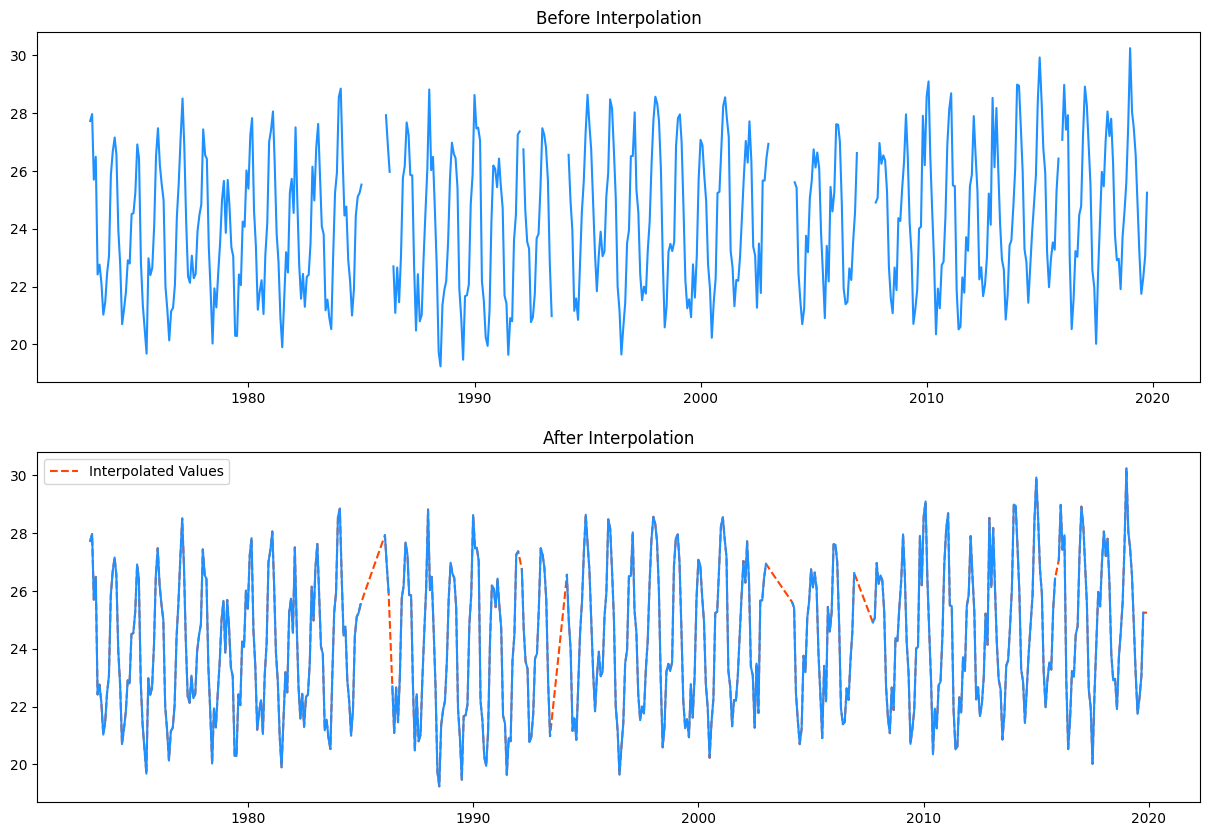

In [37]:
rows = 2
cols = 1

fig, axs = plt.subplots(2, figsize = (15, 10))

axs[0]
axs[0].set_title('Before Interpolation')
axs[0].plot(df_rio, color = 'dodgerblue')

axs[1].plot(df_rio_intp, color = 'orangered', linestyle = '--', label = 'Interpolated Values')
legend = plt.legend(loc = 'upper left')
axs[1].set_title("After Interpolation")
axs[1].plot(df_rio, color = 'dodgerblue')

plt.show()

## _Scaling - Aqui está padronizando os dados

In [38]:
temp = df_rio_intp.filter(["TEMP"])
temp_values = temp.values

train_data_len = int(np.ceil(len(temp_values) * .95)) # Use 95% of data for training

train_data_len

536

In [39]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(temp_values)

In [40]:
scaled_data.shape

(564, 1)

In [41]:
scaled_data[:5]

array([[0.77111717],
       [0.79291553],
       [0.58673933],
       [0.65849228],
       [0.28882834]])

In [42]:
df_rio_intp.head(5)

,TEMP
DATE,
1973-01-01,27.73
1973-02-01,27.97
1973-03-01,25.70
1973-04-01,26.49
1973-05-01,22.42


# Train test split

In [43]:
train_data = scaled_data[0:train_data_len, :]

X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        #print(X_train)
        #print(y_train)
        print()

print(f'X length: {len(X_train)}')
print(f'y length: {len(y_train)}')



X length: 476
y length: 476


In [44]:
X_train, y_train = np.array(X_train), np.array(y_train)

#reshaping the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [45]:
print(X_train.shape, y_train.shape)

(476, 60, 1) (476,)


In [46]:
test_data = scaled_data[train_data_len - 60 :, : ]
X_test = []
y_test = temp_values[train_data_len: , : ]

for i in range(60, len(test_data)):
    X_test.append(test_data[i -60: i, 0])

print(f'X length: {len(X_test)}')
print(f'y length: {len(y_test)}')    

X_test = np.array(X_test)

# Reshaping the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X length: 28
y length: 28


In [47]:
print(X_test.shape, y_test.shape)

(28, 60, 1) (28, 1)


# Decomposição da Série

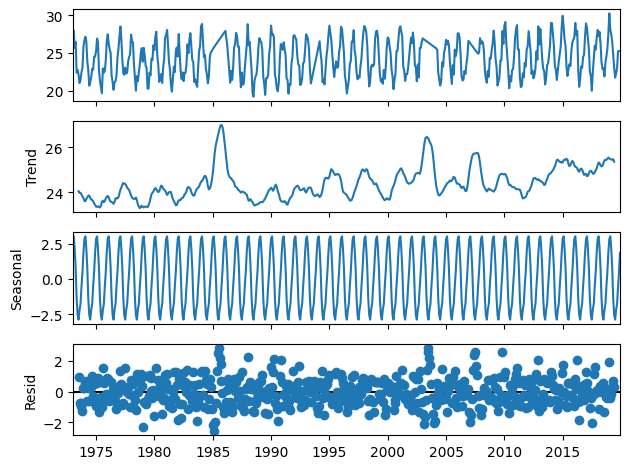

In [52]:
# Additive model
res = sm.tsa.seasonal_decompose(df_rio_intp,period=12,model="additive")
#plt.figure(figsize=(16,12))
fig = res.plot()
#fig.show()

In [55]:
# Stationarity tests
def test_stationarity(df_rio_intp):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df_rio_intp, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(df_rio_intp)

Results of Dickey-Fuller Test:
Test Statistic                  -5.174339
p-value                          0.000010
#Lags Used                      15.000000
Number of Observations Used    548.000000
Critical Value (1%)             -3.442339
Critical Value (5%)             -2.866829
Critical Value (10%)            -2.569587
dtype: float64


### MLP for Time Series Forecasting

* First we will use a Multilayer Perceptron model or MLP model, here our model will have input features equal to the window size.
* The thing with MLP models is that the model don't take the input as sequenced data, so for the model, it is just receiving inputs and don't treat them as sequenced data, that may be a problem since the model won't see the data with the sequence patter that it has.
* Input shape **[samples, timesteps]**.

In [57]:
epochs = 
batch = 
lr = 
adam = optimizers.Adam(lr)

SyntaxError: invalid syntax (1348836494.py, line 1)

In [58]:
model_mlp = Sequential()
model_mlp.add(Dense(, activation='relu', input_dim=X_train.shape[1]))
model_mlp.add(Dense())
model_mlp.compile(loss=, optimizer=adam)
model_mlp.summary()

SyntaxError: invalid syntax (64957464.py, line 2)

In [ ]:
mlp_history = model_mlp.fit(X_train.values, Y_train, validation_data=(X_valid.values, Y_valid), epochs=epochs, verbose=2)

### CNN for Time Series Forecasting

* For the CNN model we will use one convolutional hidden layer followed by a max pooling layer. The filter maps are then flattened before being interpreted by a Dense layer and outputting a prediction.
* The convolutional layer should be able to identify patterns between the timesteps.
* Input shape **[samples, timesteps, features]**.

#### Data preprocess
* Reshape from [samples, timesteps] into [samples, timesteps, features].
* This same reshaped data will be used on the CNN and the LSTM model.

In [ ]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_series = X_valid.values.reshape((X_valid.shape[0], X_valid.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse', optimizer=adam)
model_cnn.summary()

In [ ]:
cnn_history = model_cnn.fit(X_train_series, Y_train, validation_data=(X_valid_series, Y_valid), epochs=epochs, verbose=2)